# Manuscript Figure 1: A Zoology of Dimensionality Reduction Outcomes

In this notebook I want to re-do the code for the first figure in the paper.  As a reminder, this was a Figure that showed how processing the Tabula Muris Marrow data using different algorithms and hyperparameters results in different qualitative features.  Specifically, it was a 2x2 figure showing two t-SNE and two UMAP embeddings, each at $k=15$ and $k=400$.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
# import PaperV4_PlottingScripts.plotting_utility as pUtl
import pandas as pd
import scanpy as sc
import seaborn as sns
from sklearn.metrics import pairwise_distances as pwd
import warnings

%matplotlib inline

warnings.filterwarnings("ignore", message="This figure includes Axes that")
warnings.filterwarnings("ignore", message="tight_layout not applied: ")

### Set runtime parameters here...

In [8]:
## Set the figure base name
name_base = "EMBEDRFigure_01v1_DimRedZoology"

## Select which data to use
seq_type = "FACS"
tissue = "Marrow"

## Set parameters at which to plot data
DR_params = [('tSNE', 7),
             ('UMAP', 15),
             ('tSNE', 250),
             ('UMAP', 400)]

## Set other parameters
n_components   = 2

tSNE_exag_iter = 250
tSNE_n_iter    = 1000 - tSNE_exag_iter

random_seed    = 1
initialization = 'random'
n_jobs         = -1

## Data directory
data_dir = f"../../data/TabulaMuris/"

## Figure directory
fig_dir = f"./"

## Runtime flags
show_all_axes = False         ## Show ALL axes borders (useful for gridspec setup)
color_by_cluster = True       ## Color plot by cell type cluster annotations.
color_by_variability = False  ## Color plot by kEff / dist to NN

### Load the data and metadata

In [9]:
data = sc.read_h5ad(os.path.join(data_dir, f"{seq_type}/Processed_{tissue.title()}.h5ad"))
data.obs.head()

X = data.obsm['X_pca']
n_samples, n_features = X.shape
print(f"Input data `X` is {n_samples} x {n_features}!")

Input data `X` is 5037 x 50!


### Set Figure Parameters

In [ ]:
## Environment-wide parameters.
plt.rcParams['svg.fonttype'] = 'none'
sns.set(color_codes=True)
sns.set_style('whitegrid')
matplotlib.rc("font", size=10)
matplotlib.rc("xtick", labelsize=10)
matplotlib.rc("ytick", labelsize=10)
matplotlib.rc("axes", labelsize=12)
matplotlib.rc("axes", titlesize=16)
matplotlib.rc("legend", fontsize=10)
matplotlib.rc("figure", titlesize=12)

## Figure size and gridspec size
my_dpi = 400
fig_wid = 7.2  ## inches (8 inch-wide paper minus margins)
fig_hgt = 0.8 * fig_wid

## Automatically set n_rows based on conditions and n_cols.
n_cols = 2
n_rows = int(np.ceil(len(DR_params) / n_cols))

## Main gridspec parameters.
if color_by_cluster:  ## We need less space if coloring by cluster.
    main_wspace    = 0.005
    fig_pad        = 0.5
else:
    main_wspace    = 0.15
    fig_pad        = 3
main_hspace        = 0.01
main_spns_2_show   = 'all'
main_spn_alpha     = 0.5
main_spn_width     = 1.0
main_height_ratios = [1, 1]

## Toggle for axes borders.
if show_all_axes:
    spine_alpha = 1
else:
    spine_alpha = 0

In [69]:
import EMBEDR

In [70]:
import EMBEDR.plots.EMBEDR_Figure_01v1_DimRed_Zoology as F01

In [34]:
%run ../../EMBEDR/plots/EMBEDR_Figure_01v1_DimRed_Zoology.py




	Generating EMBEDR Figure 01v1 (Dim. Red. Zoology)





<Figure size 432x288 with 0 Axes>

/Users/EricJohnson/opt/anaconda3/envs/EMBEDR/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)



Plotting tSNE embedding (param = 9)


Plotting UMAP embedding (param = 15)


Plotting tSNE embedding (param = 350)


Plotting UMAP embedding (param = 400)



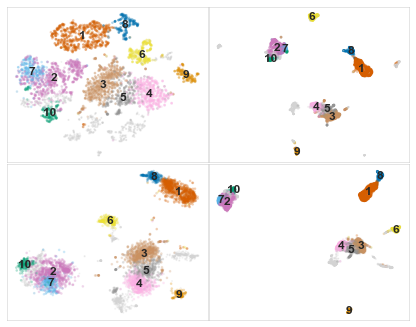

In [74]:
cluster_labels = np.asarray([cell_ont_map[cId] for cId in cell_ont_meta]).reshape(-1, 1)
F01.make_figure(X, cluster_labels, EMBEDR_params={'verbose':0})